## Project Name: PS4 Games Sales Data Analysis 

### Importing Libraries:

Numpy is requried whenever calculations are required (calculating means, medians, sqaure root, etc.).  Pandas is a great module for data processing and data frames.

In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored

import warnings
warnings.simplefilter('ignore')

### Loading Dataset &amp; Exploratory Data Analysis:

We would use the pandas module to read the files. Using the "read_csv" function. The files format is .csv.

In [37]:
data = pd.read_csv('PS4_GamesSales.csv', header=0,encoding='unicode_escape')
pd.set_option('display.max_columns',None)
pd.set_option("display.max_rows",None)

print('The data has the shape of', data.shape[0], 'Rows and', data.shape[1], 'columns')

print(data.info())
print(data.describe())


The data has the shape of 1034 Rows and 9 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB
None
              Year  North America       Europe        Japan  Rest of World  \
count   825.000000    1034.000000  1034.000000  1034.000000    1034.000000   
mean   2015.966061       0.204613     0.248714     0.033636       0.089014   
std       1.298360       0.563471     0.785491     0.108344       0.

The "head" fucntion displays the first 5 rows of the data frame

In [38]:
print(data.head())

                        Game    Year             Genre       Publisher  \
0         Grand Theft Auto V  2014.0            Action  Rockstar Games   
1  Call of Duty: Black Ops 3  2015.0           Shooter      Activision   
2      Red Dead Redemption 2  2018.0  Action-Adventure  Rockstar Games   
3         Call of Duty: WWII  2017.0           Shooter      Activision   
4                    FIFA 18  2017.0            Sports       EA Sports   

   North America  Europe  Japan  Rest of World  Global  
0           6.06    9.71   0.60           3.02   19.39  
1           6.18    6.05   0.41           2.44   15.09  
2           5.26    6.21   0.21           2.26   13.94  
3           4.67    6.21   0.40           2.12   13.40  
4           1.27    8.64   0.15           1.73   11.80  


In [39]:
data.tail(10)

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
1024,Biomutant,2018.0,Action,THQ Nordic,0.0,0.0,0.0,0.0,0.0
1025,Biomutant,2019.0,Action,THQ Nordic,0.0,0.0,0.0,0.0,0.0
1026,de Blob,2017.0,Platform,THQ Nordic,0.0,0.0,0.0,0.0,0.0
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.0,0.0,0.0,0.0,0.0
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.0,0.0,0.0,0.0,0.0
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.0,0.0,0.0,0.0,0.0
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.0,0.0,0.0,0.0,0.0
1031,The Mummy Demastered,NaN,Action,NaN,0.0,0.0,0.0,0.0,0.0
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.0,0.0,0.0,0.0,0.0
1033,Battle Chef Brigade,NaN,Action,NaN,0.0,0.0,0.0,0.0,0.0


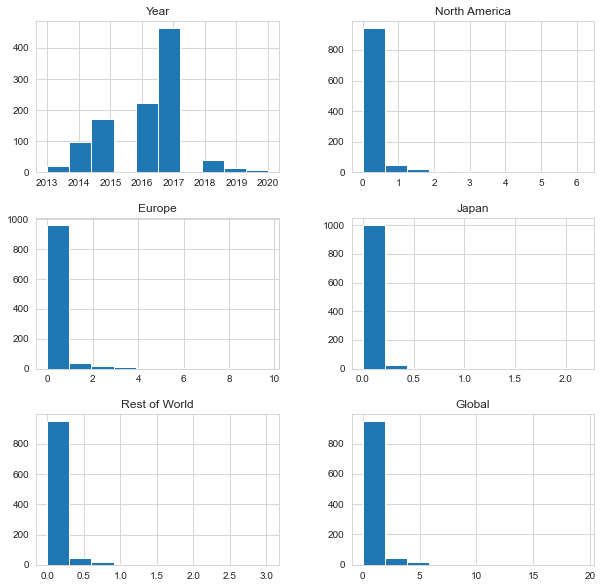

(1034, 9)
Index(['Game', 'Year', 'Genre', 'Publisher', 'North America', 'Europe',
       'Japan', 'Rest of World', 'Global'],
      dtype='object')


In [73]:
data.hist(figsize=(10,10))
plt.show()
print(data.shape)
print(data.columns)

### Pair Plot

Plot pairwise relationships in a dataset. By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column. It is also possible to show a subset of variables or plot different variables on the rows and columns.

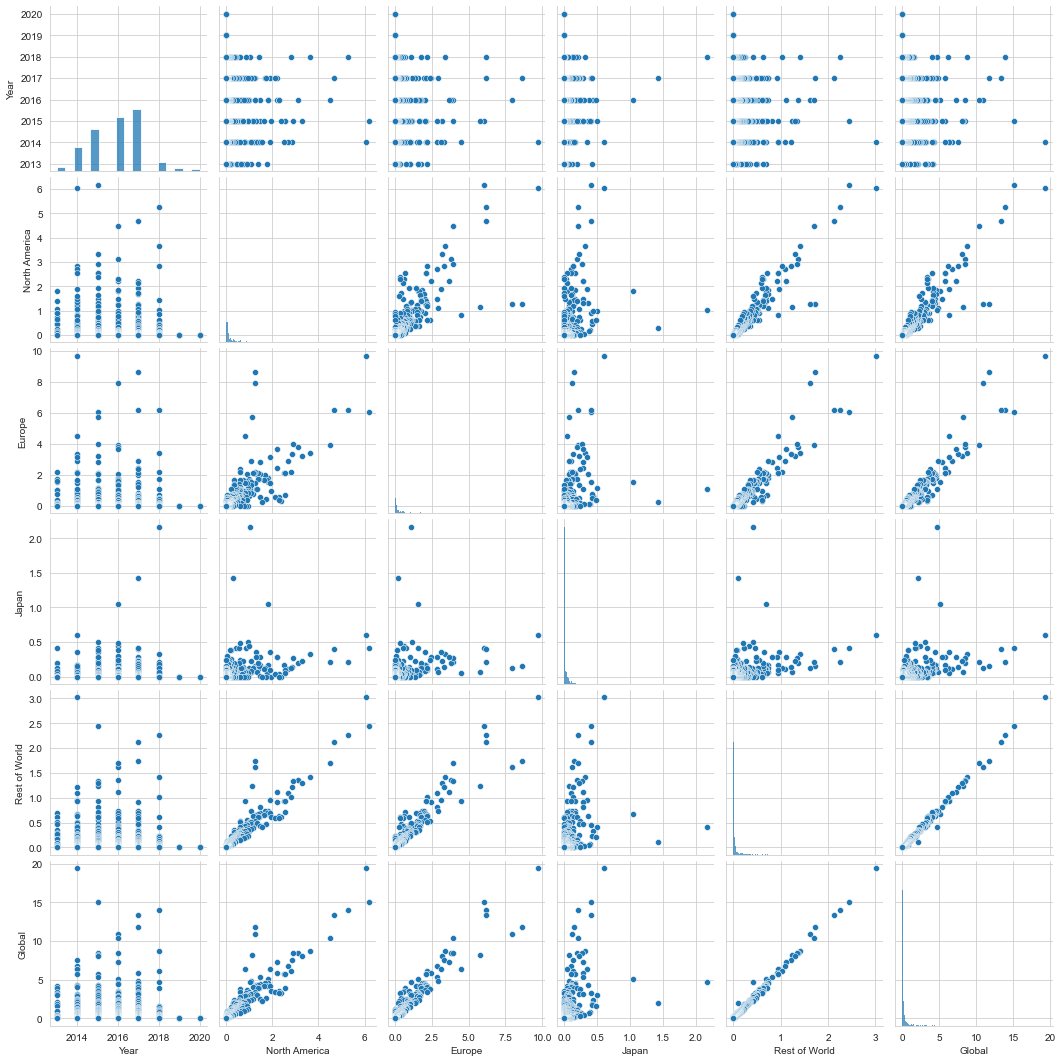

In [41]:
sns.pairplot(data)

### CorrelationStrength of the relationship between two variables

In [42]:
data.corr()

,Year,North America,Europe,Japan,Rest of World,Global
Year,1.000000,-0.103980,-0.107421,0.009107,-0.111522,-0.107493
North America,-0.103980,1.000000,0.815997,0.406298,0.953213,0.938472
Europe,-0.107421,0.815997,1.000000,0.375338,0.952478,0.962152
Japan,0.009107,0.406298,0.375338,1.000000,0.410368,0.463692
Rest of World,-0.111522,0.953213,0.952478,0.410368,1.000000,0.997221
Global,-0.107493,0.938472,0.962152,0.463692,0.997221,1.000000


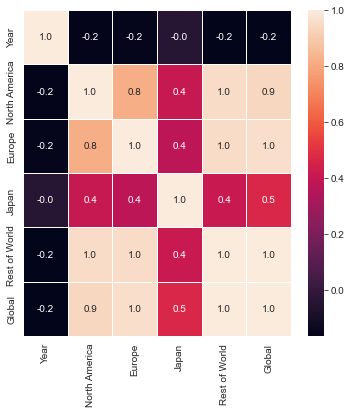

In [72]:
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

Huge matrix that includes a lot of numbers. The range of this numbers are -1 to 1. Meaning of 1 is two variable are positively correlated with each other like radius mean and area mean. Meaning of zero is there is no correlation between variables like radius mean and fractal dimension seMeaning of -1 is two variables are negatively correlated with each other like radius mean and fractal dimension mean.Actually correlation between of them is not -1, it is -0.3 but the idea is that if sign of correlation is negative that means that there is negative correlation.

### Missing Values Distribution:

DataFrame isna() detect missing values. Return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy NaN, gets mapped to True values. Everything else gets mapped to False values.

Missing values column wise -
Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64


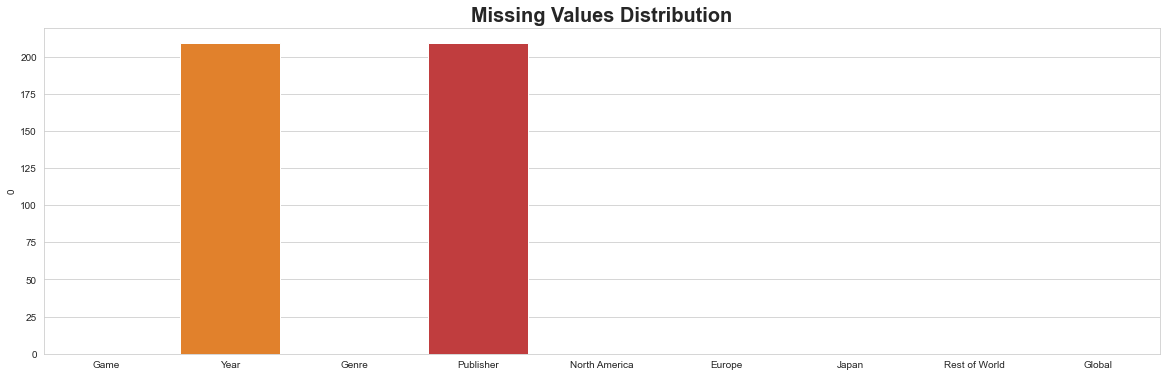

In [44]:
plt.figure(figsize=(20,6))

na = pd.DataFrame(data.isna().sum())

sns.barplot(y=na[0], x=na.index)
plt.title('Missing Values Distribution', size = 20, weight='bold')
print(colored("Missing values column wise -", 'magenta'))
print(colored(data.isna().sum(), 'magenta'))

plt.show()

### Calculate the % of missing data from each column

In [45]:
nan_ratio = []
for col in data.columns:
    nan_item = []
    nan_item.append(col)
    nan_item.append(data[col].isnull().sum())
    nan_item.append(str(round(100 * data[col].isnull().sum() / data.shape[0], 2)) + '%')
    nan_ratio.append(nan_item)

df_nan = pd.DataFrame(nan_ratio, columns=["Column", "NaN count", "NaN ratio"]).set_index("Column")
df_nan = df_nan.sort_values("NaN ratio", ascending=False)
print(df_nan.astype(object).T)

Column       Year Publisher  Game Genre North America Europe Japan  \
NaN count     209       209     0     0             0      0     0   
NaN ratio  20.21%    20.21%  0.0%  0.0%          0.0%   0.0%  0.0%   

Column    Rest of World Global  
NaN count             0      0  
NaN ratio          0.0%   0.0%  


<AxesSubplot:>

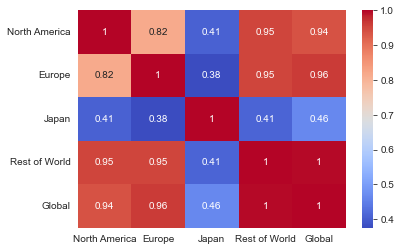

In [46]:
from sklearn.impute import SimpleImputer
data = data.replace('N.V.', np.nan)

s_imp = SimpleImputer(strategy = 'most_frequent', verbose = 1).fit(data[['Year', 'Publisher']])
data[['Year', 'Publisher']] = s_imp.transform(data[['Year', 'Publisher']])


sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [47]:
data['Year'] = data['Year'].astype('int64')

In [48]:
print(data.isnull().sum().sort_values())

Game             0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
dtype: int64


### Which genre is the most popular?

Seaborn countplot show the counts of observations in each categorical bin using bars.

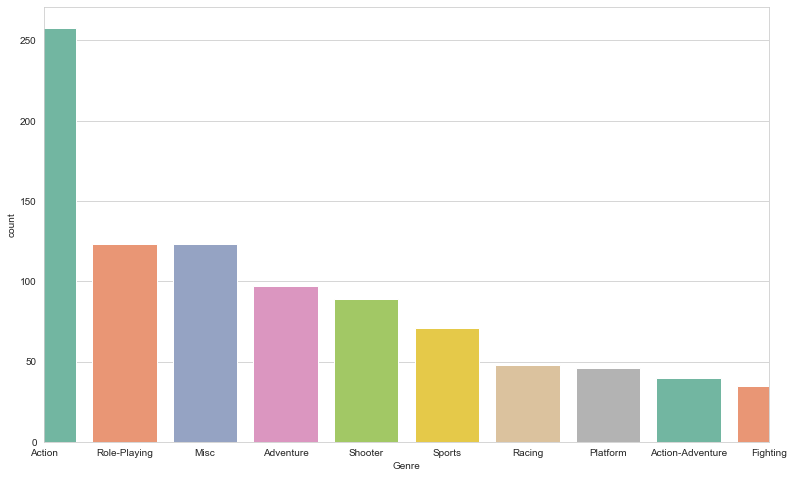

In [49]:
plt.figure(figsize=(13, 8))

sns.countplot(data=data, x='Genre', order=data['Genre'].value_counts().keys(), palette="Set2").set_xlim(0, 9)

plt.show()

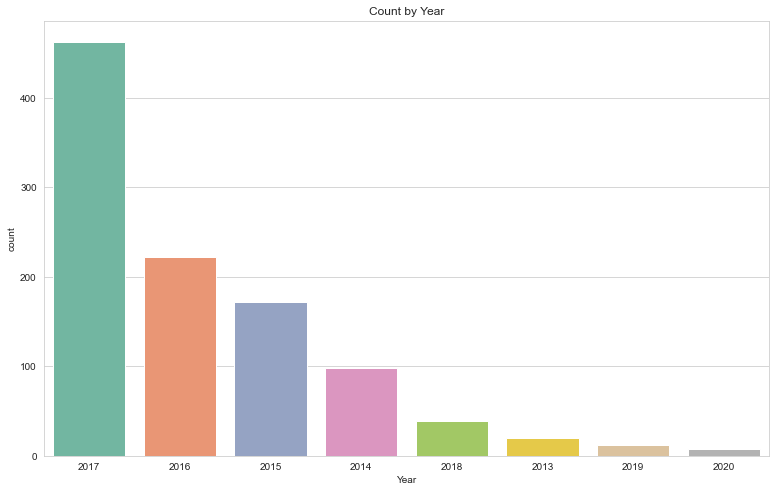

In [50]:
plt.figure(figsize=(13, 8))

sns.countplot(data=data, x='Year', order=data['Year'].value_counts().keys(), palette="Set2").set(title='Count by Year')

plt.show()

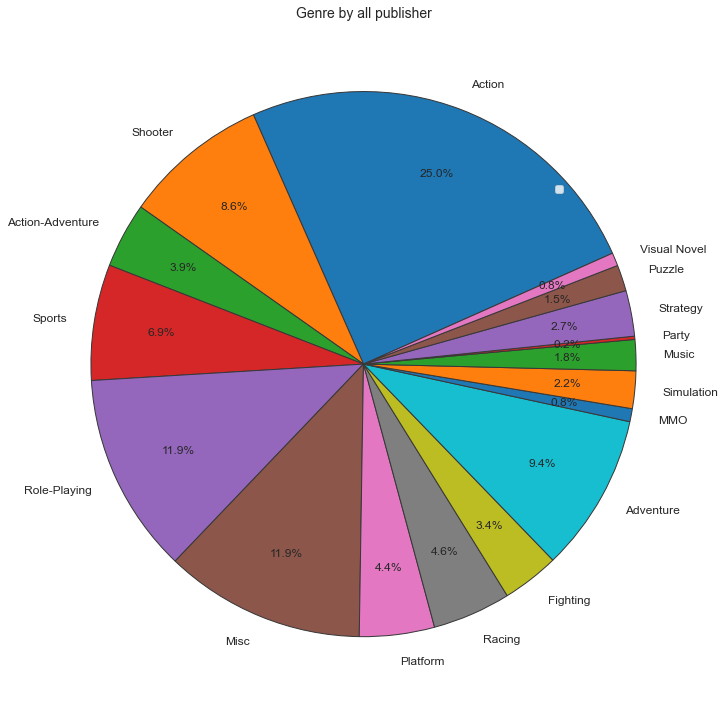

In [70]:
x = data.Genre.value_counts(sort=False)

fig, ax = plt.subplots(figsize=(15, 10))

ax.pie(x, labels = data.Genre.unique(), autopct='%.1f%%', pctdistance=.75, startangle=24,
       textprops={"fontsize":12}, wedgeprops={'edgecolor':'#383838'})

ax.set_title('Genre by all publisher', fontdict={'fontsize':14})
ax.legend([], bbox_to_anchor=(.8, .77))

fig = plt.gcf()

plt.tight_layout()
plt.show()

In [52]:
print(data['Game'].value_counts().head(5))

Biomutant                                                                         2
Apotheon                                                                          2
War Thunder                                                                       2
Battle Worlds: Kronos                                                             1
Yahari Game Demo Ore no Seishun Love-Kome wa Machigatteiru. & Zoku: Oatome Set    1
Name: Game, dtype: int64


Count number of distinct elements in specified axis.

In [53]:
print(data['Game'].nunique())

1031


### Publisher

The unique() function is used to find the unique elements of an array.

In [54]:
print(data.Publisher.nunique())


152


In [55]:
 x = data['Publisher'].value_counts().head()
 print(x)

Namco Bandai Games                265
Sony Interactive Entertainment     47
Ubisoft                            45
Square Enix                        40
Tecmo Koei                         37
Name: Publisher, dtype: int64


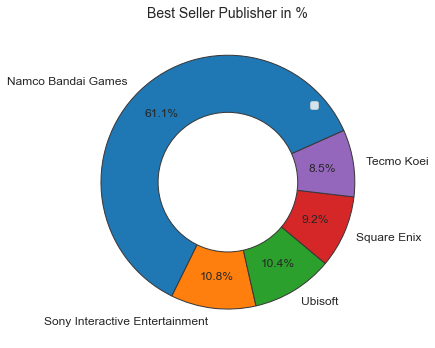

In [56]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(x, labels = ('Namco Bandai Games ', 'Sony Interactive Entertainment ', 'Ubisoft ', 'Square Enix ', 'Tecmo Koei'), autopct='%.1f%%', pctdistance=.75, startangle=24,
       textprops={"fontsize":12}, wedgeprops={'edgecolor':'#383838'})

ax.set_title('Best Seller Publisher in %', fontdict={'fontsize':14})
ax.legend([], bbox_to_anchor=(.8, .77))
centre_circle = plt.Circle((0,0),0.55,fc='white', ec='#383838')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'Best Seller Publisher')]

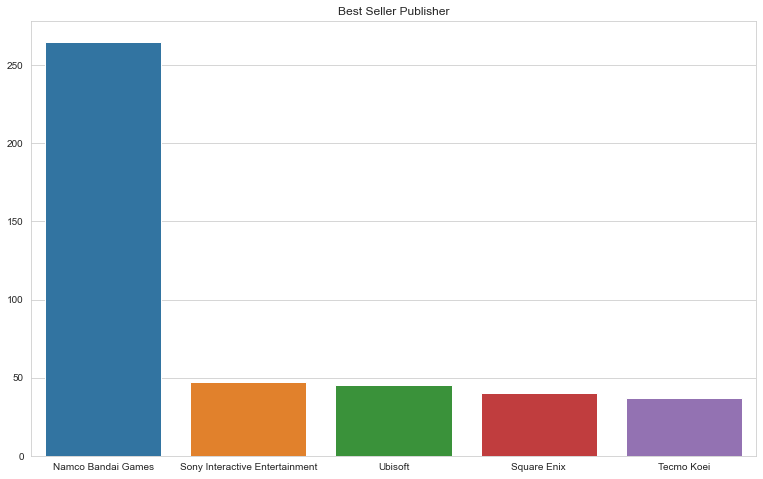

In [57]:
plt.figure(figsize=(13, 8))
publisher = data['Publisher'].value_counts(ascending=False).head()
sns.barplot(x = publisher.index, y = publisher.values).set(title='Best Seller Publisher')



### Namco Bandai Games:

In [58]:
games = data[data["Publisher"] == "Namco Bandai Games"]
print(games.head())


                                         Game  Year         Genre  \
21                   The Witcher 3: Wild Hunt  2015  Role-Playing   
65                             Dark Souls III  2016  Role-Playing   
95                                   Tekken 7  2017      Fighting   
100  Naruto Shippuden: Ultimate Ninja Storm 4  2016      Fighting   
103                  Dragon Ball: Xenoverse 2  2016        Action   

              Publisher  North America  Europe  Japan  Rest of World  Global  
21   Namco Bandai Games           1.48    2.82   0.28           0.81    5.39  
65   Namco Bandai Games           1.00    0.63   0.44           0.34    2.42  
95   Namco Bandai Games           0.60    0.72   0.12           0.26    1.70  
100  Namco Bandai Games           0.71    0.47   0.12           0.24    1.54  
103  Namco Bandai Games           0.54    0.59   0.14           0.23    1.50  


Zero value check:

In [59]:
print(games.isnull().sum().sort_values())

Game             0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
dtype: int64


### What is the best selling genre by Namco Bandai Games?

Creating a pie plot :

In [60]:
print(games['Genre'].value_counts().head())

Misc            72
Action          69
Role-Playing    33
Adventure       27
Platform        14
Name: Genre, dtype: int64


In [61]:
print(x.keys())

Index(['Namco Bandai Games', 'Sony Interactive Entertainment', 'Ubisoft',
       'Square Enix', 'Tecmo Koei'],
      dtype='object')


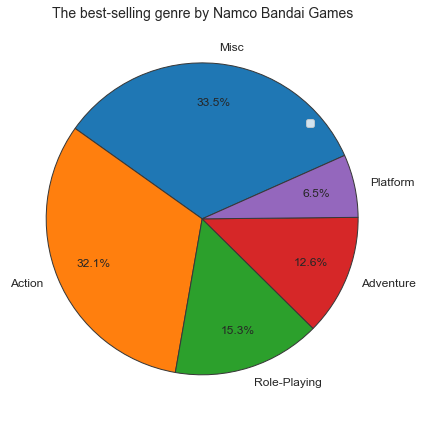

In [71]:
x = games['Genre'].value_counts().head()

fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(x, labels = x.keys(), autopct='%.1f%%', pctdistance=.75, startangle=24,
       textprops={"fontsize":12}, wedgeprops={'edgecolor':'#383838'})

ax.set_title('The best-selling genre by Namco Bandai Games', fontdict={'fontsize':14})
ax.legend([], bbox_to_anchor=(.8, .77))

fig = plt.gcf()

plt.tight_layout()
plt.show()

In [63]:
print(games['Year'].value_counts().head())

2017    225
2016     18
2015     17
2018      3
2014      2
Name: Year, dtype: int64


### How did the total sales change in North America, Europe, Japan, other area from 2013 to 2020?

Finding maximum sales values :

In [64]:
n1 = np.around( data['North America'].max(), 2)
print('Max Sales Value in North America is : ', n1)

n2 = np.around( data['Europe'].max(), 2)
print('Max Sales Value in Europe is : ', n2)

n3 = np.around( data['Japan'].max(), 2)
print('Max Sales Value in Japan is : ', n3)

n4 = np.around( data['Rest of World'].max(), 2)
print('Max Sales Value in Rest of World is : ', n4)


Max Sales Value in North America is :  6.18
Max Sales Value in Europe is :  9.71
Max Sales Value in Japan is :  2.17
Max Sales Value in Rest of World is :  3.02


In [65]:
n = n1, n2, n3, n4
print(n)

(6.18, 9.71, 2.17, 3.02)


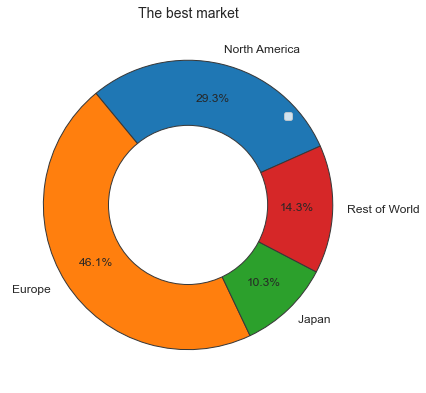

In [66]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(n, labels = ('North America', 'Europe ', 'Japan ', 'Rest of World'), autopct='%.1f%%', pctdistance=.75, startangle=24,
       textprops={"fontsize":12}, wedgeprops={'edgecolor':'#383838'})

ax.set_title('The best market', fontdict={'fontsize':14})
ax.legend([], bbox_to_anchor=(.8, .77))
centre_circle = plt.Circle((0,0),0.55,fc='white', ec='#383838')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

Market comparison :

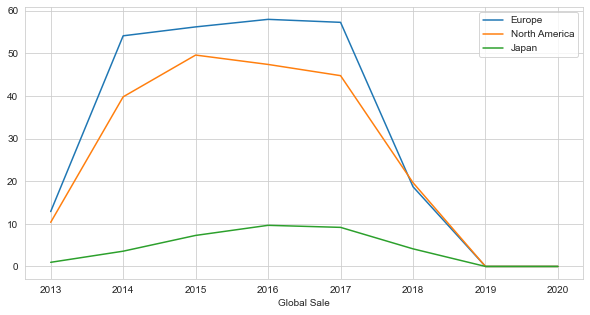

In [67]:
plt.subplots(figsize = (10,5))

plt.plot(data.groupby(by='Year')['Europe'].sum(), label = 'Europe')
plt.plot(data.groupby(by='Year')['North America'].sum(), label = 'North America')
plt.plot(data.groupby(by='Year')['Japan'].sum(), label = 'Japan')

plt.legend()
plt.xlabel('Global Sale')
plt.show()




Text(0.5, 1.0, 'Sales in Rest of World')

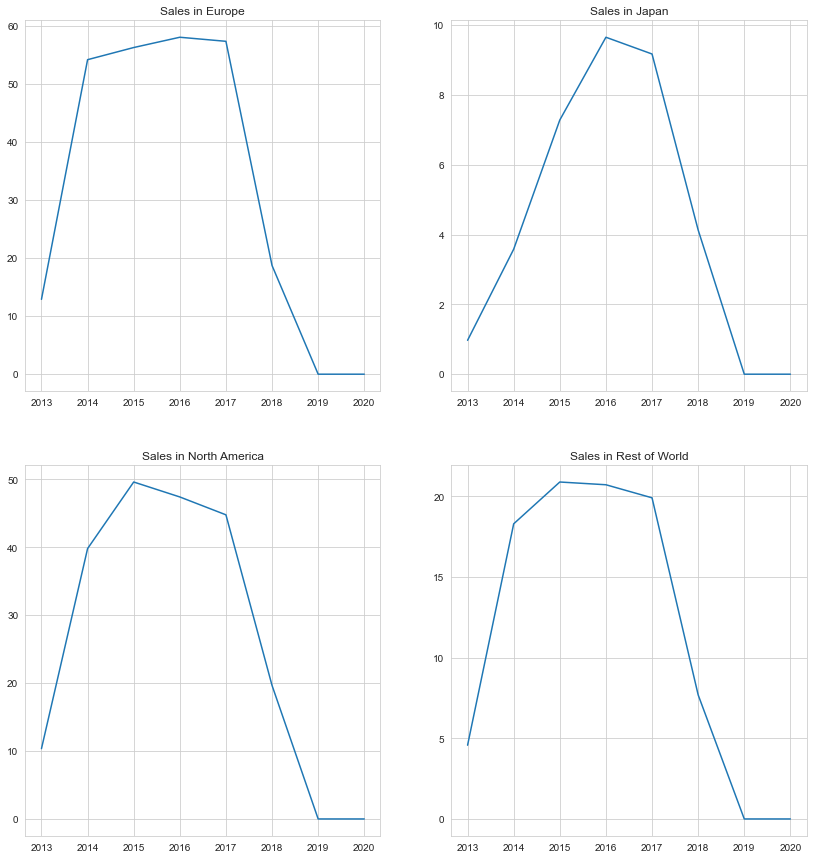

In [68]:
fig, ax = plt.subplots(nrows= 2, ncols=2, figsize=(14, 15), sharex=False)
ax[0, 0].plot(data.groupby('Year').Europe.sum())
ax[0, 0].set_title('Sales in Europe')

ax[0, 1].plot(data.groupby('Year').Japan.sum())
ax[0, 1].set_title('Sales in Japan')

ax[1, 0].plot(data.groupby('Year')['North America'].sum())
ax[1, 0].set_title('Sales in North America')

ax[1, 1].plot(data.groupby('Year')['Rest of World'].sum())
ax[1, 1].set_title('Sales in Rest of World')